## This notebook makes the figures in Figure 3B, and Supplemental Figures 9 and 10

In [2]:
# Loading R packages
library(reshape)
library(ggplot2)
library(phyloseq)
library(plyr)
library(dplyr)
library(plotly)
library(wesanderson)
library(vegan)
library(corrplot)
library(ade4)

In [3]:
# Importing the dataset
ps = readRDS("../../../data/Seq_data/16S/CHTC/Dada2_Results_Full/ps.merged")

In [4]:
# Pulling out just O and just M horizon data separately
# We have to merge by Site ID to make the sample names match the vegetation matrix names (no O or M distinction)

ps.org = prune_samples(sample_data(ps)$Org_or_Min %in% c("O"), ps)
ps.min = prune_samples(sample_data(ps)$Org_or_Min %in% c("M"), ps)
ps.org.merged = merge_samples(ps.org, "Site_ID")
ps.min.merged = merge_samples(ps.min, "Site_ID")
ps.merged = merge_samples(ps,"Sample_ID")

# Normalizing by relative abundance to match vegetation data
ps.org.merged.norm = transform_sample_counts(ps.org.merged, function(x) x / sum(x) )
ps.min.merged.norm = transform_sample_counts(ps.min.merged, function(x) x / sum(x) )
ps.merged.norm = transform_sample_counts(ps.merged, function(x) x/sum(x))

In [5]:
# Calculate dissimilarities
Dist.org.mb = as.matrix(distance(ps.org.merged.norm, method="bray", type="samples"))
Dist.min.mb = as.matrix(distance(ps.min.merged.norm, method="bray", type="samples"))
Dist.mb = as.matrix(distance(ps.merged.norm, method="bray", type="samples"))

In [6]:
# Bring in vegetation percent coverage bray-curtis matrix
Dist.veg = read.csv("../../../../../../../Users/Thea/Documents/Madison/Box\ Sync/WhitmanLabMaster/WhitmanLab/Projects/WoodBuffalo/WB2015/data/Veg_properties/WBNPNWT_Vegetation_Braydistance_2015.csv")
row.names(Dist.veg)=Dist.veg$X
Dist.veg=Dist.veg[,2:dim(Dist.veg)[2]]
colnames(Dist.veg)=row.names(Dist.veg)

In [7]:
# Find common samples
OrgSamples = colnames(as.matrix(Dist.org.mb))[colnames(as.matrix(Dist.org.mb)) %in% colnames(as.matrix(Dist.veg))]
MinSamples = colnames(as.matrix(Dist.min.mb))[colnames(as.matrix(Dist.min.mb)) %in% colnames(as.matrix(Dist.veg))]

In [8]:
# Exclude uncommon samples
Dist.org.veg = Dist.veg[row.names(Dist.veg) %in% OrgSamples,colnames(Dist.veg) %in% OrgSamples]
Dist.min.veg = Dist.veg[row.names(Dist.veg) %in% MinSamples,colnames(Dist.veg) %in% MinSamples]
Dist.org.mb = Dist.org.mb[row.names(Dist.org.mb) %in% OrgSamples,colnames(Dist.org.mb) %in% OrgSamples]
Dist.min.mb = Dist.min.mb[row.names(Dist.min.mb) %in% MinSamples,colnames(Dist.min.mb) %in% MinSamples]

In [9]:
# Just checking
colnames(Dist.org.mb) == colnames(Dist.org.veg)

[1] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[16] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[31] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[46] TRUE TRUE

### Mantel tests

In [13]:
# Getting Site ID names of uplands and wetlands
Uplands = sample_data(ps)[sample_data(ps)$Land_Class=="Upland"]$Site_ID
Wetlands = sample_data(ps)[sample_data(ps)$Land_Class=="Wetland"]$Site_ID

In [14]:
# Putting together corresponding matrices for uplands/wetlands x organic/mineral horizons
Dist.org.veg.up =Dist.org.veg[row.names(Dist.org.veg) %in% Uplands ,colnames(Dist.org.veg) %in% Uplands]
Dist.min.veg.up =Dist.min.veg[row.names(Dist.min.veg) %in% Uplands ,colnames(Dist.min.veg) %in% Uplands]
Dist.org.mb.up =Dist.org.mb[row.names(Dist.org.mb) %in% Uplands ,colnames(Dist.org.mb) %in% Uplands]
Dist.min.mb.up =Dist.min.mb[row.names(Dist.min.mb) %in% Uplands ,colnames(Dist.min.mb) %in% Uplands]
Dist.org.veg.wet =Dist.org.veg[row.names(Dist.org.veg) %in% Wetlands ,colnames(Dist.org.veg) %in% Wetlands]
Dist.min.veg.wet =Dist.min.veg[row.names(Dist.min.veg) %in% Wetlands ,colnames(Dist.min.veg) %in% Wetlands]
Dist.org.mb.wet =Dist.org.mb[row.names(Dist.org.mb) %in% Wetlands ,colnames(Dist.org.mb) %in% Wetlands]
Dist.min.mb.wet =Dist.min.mb[row.names(Dist.min.mb) %in% Wetlands ,colnames(Dist.min.mb) %in% Wetlands]

In [15]:
#Running all Mantel tests
mantel.rtest(m1 = as.dist(Dist.org.veg.up), m2 = as.dist(Dist.org.mb.up), nrepet = 9999)

Monte-Carlo test
Call: mantelnoneuclid(m1 = m1, m2 = m2, nrepet = nrepet)

Observation: 0.09362922 

Based on 9999 replicates
Simulated p-value: 0.1216 
Alternative hypothesis: greater 

      Std.Obs   Expectation      Variance 
 1.170092e+00 -4.288971e-05  6.408859e-03 

In [16]:
mantel.rtest(m1 = as.dist(Dist.org.veg.wet), m2 = as.dist(Dist.org.mb.wet), nrepet = 9999)

Monte-Carlo test
Call: mantelnoneuclid(m1 = m1, m2 = m2, nrepet = nrepet)

Observation: 0.6260577 

Based on 9999 replicates
Simulated p-value: 3e-04 
Alternative hypothesis: greater 

     Std.Obs  Expectation     Variance 
 4.402361297 -0.000691055  0.020268219 

In [17]:
mantel.rtest(m1 = as.dist(Dist.min.veg.up), m2 = as.dist(Dist.min.mb.up), nrepet = 9999)

Monte-Carlo test
Call: mantelnoneuclid(m1 = m1, m2 = m2, nrepet = nrepet)

Observation: 0.2919319 

Based on 9999 replicates
Simulated p-value: 2e-04 
Alternative hypothesis: greater 

     Std.Obs  Expectation     Variance 
3.5268396686 0.0007862153 0.0068147390 

In [18]:
mantel.rtest(m1 = as.dist(Dist.min.veg.wet), m2 = as.dist(Dist.min.mb.wet), nrepet = 9999)

Monte-Carlo test
Call: mantel.rtest(m1 = as.dist(Dist.min.veg.wet), m2 = as.dist(Dist.min.mb.wet), 
    nrepet = 9999)

Observation: -0.9278853 

Based on 9999 replicates
Simulated p-value: 1 
Alternative hypothesis: greater 

      Std.Obs   Expectation      Variance 
-1.3181738325 -0.0007698203  0.4946776535 

## Plots

In [20]:
# Making a matrix with one data entry for each site
SamDat = sample_data(ps)[!duplicated(sample_data(ps)$Site_ID),]
rownames(SamDat) = SamDat$Site_ID

In [21]:
df = data.frame(melt(as.matrix(Dist.org.veg)),melt(as.matrix(Dist.org.mb)))
#Generates a dataframe with each contrast and the dissimilarity for the plant comm and the mb comm
df = df[,c(1,2,3,6)]
colnames(df) = c("Site_ID_1","Site_ID_2","Mb_dist","Veg_dist")

for (i in df$Site_ID_1){
    df$Land_Class_1[df$Site_ID_1==i] = paste(SamDat$Land_Class[SamDat$Site_ID==i])
}

head(df)

Site_ID_1,Site_ID_2,Mb_dist,Veg_dist,Land_Class_1
15S-NT-19,15S-NT-19,0.0000000,0.0000000,Wetland
15S-NT-20,15S-NT-19,0.7032652,0.9056834,Wetland
15S-NT-21,15S-NT-19,0.6677345,0.7271161,Wetland
15S-NT-22,15S-NT-19,0.9649712,0.8458057,Upland
15S-NT-23,15S-NT-19,1.0000000,0.7817670,Upland
15S-NT-24,15S-NT-19,0.9657845,0.7704916,Upland


In [22]:
df = data.frame(melt(as.matrix(Dist.org.veg)),melt(as.matrix(Dist.org.mb)))
#Generates a dataframe with each contrast and the dissimilarity for the plant comm and the mb comm
df = df[,c(1,2,3,6)]
colnames(df) = c("Site_ID_1","Site_ID_2","Mb_dist","Veg_dist")
#df$X1==df$X1.1 # making sure the contrasts are the same

# Need to add datasets for each site type, and then whether they are the same or not.
# Let's start with wetland vs. upland
for (i in paste(df$Site_ID_1)){
    df$Land_Class_1[df$Site_ID_1==i] = paste(SamDat$Land_Class[SamDat$Site_ID==i])
}
for (i in df$Site_ID_2){
    df$Land_Class_2[df$Site_ID_2==i] = paste(SamDat$Land_Class[SamDat$Site_ID==i])
}
df$Land_Class = ifelse(df$Land_Class_1==df$Land_Class_2,df$Land_Class_1,"Different")

# Let's add Veg_Comm
for (i in df$Site_ID_1){
    df$Veg_Comm_1[df$Site_ID_1==i] = paste(SamDat$Veg_Comm[SamDat$Site_ID==i])
}
for (i in df$Site_ID_2){
    df$Veg_Comm_2[df$Site_ID_2==i] = paste(SamDat$Veg_Comm[SamDat$Site_ID==i])
}
df$Veg_Comm = ifelse(df$Veg_Comm_1==df$Veg_Comm_2,df$Veg_Comm_1,"Different")

# Let's add Burned_Unburned
for (i in df$Site_ID_1){
    df$Burned_Unburned_1[df$Site_ID_1==i] = paste(SamDat$Burned_Unburned[SamDat$Site_ID==i])
}
for (i in df$Site_ID_2){
    df$Burned_Unburned_2[df$Site_ID_2==i] = paste(SamDat$Burned_Unburned[SamDat$Site_ID==i])
}
df$Burned_Unburned = ifelse(df$Burned_Unburned_1==df$Burned_Unburned_2,df$Burned_Unburned_1,"Different")

# And let's add Burn_Severity_Index
for (i in df$Site_ID_1){
    df$Burn_Severity_Index_1[df$Site_ID_1==i] = SamDat$Burn_Severity_Index[SamDat$Site_ID==i]
}
for (i in df$Site_ID_2){
    df$Burn_Severity_Index_2[df$Site_ID_2==i] = SamDat$Burn_Severity_Index[SamDat$Site_ID==i]
}
df$Burn_Severity_Index_1 = as.numeric(df$Burn_Severity_Index_1)
df$Burn_Severity_Index_2 = as.numeric(df$Burn_Severity_Index_2)
df$Burn_Severity_Index_Diff = abs(as.numeric(df$Burn_Severity_Index_1) - as.numeric(df$Burn_Severity_Index_2))
df$Burn_Severity_Index_Mean = (as.numeric(df$Burn_Severity_Index_1) + as.numeric(df$Burn_Severity_Index_2))/2
df$Burn_Severity_Index_Ratio = as.numeric(df$Burn_Severity_Index_1) / as.numeric(df$Burn_Severity_Index_2)
df$Burn_Severity_Index_Class = ifelse(df$Burn_Severity_Index_1>mean(df$Burn_Severity_Index_1) &
                                     df$Burn_Severity_Index_2>mean(df$Burn_Severity_Index_1),"high",
                                      ifelse(df$Burn_Severity_Index_1<mean(df$Burn_Severity_Index_1) &
                                     df$Burn_Severity_Index_2<mean(df$Burn_Severity_Index_1),"low","mixed"))
df$Burn_Severity_Index_Class = ordered(df$Burn_Severity_Index_Class, levels = c("high", "mixed", "low"))

# And let's add CBI
for (i in df$Site_ID_1){
    df$CBI_1[df$Site_ID_1==i] = SamDat$CBI[SamDat$Site_ID==i]
}
for (i in df$Site_ID_2){
    df$CBI_2[df$Site_ID_2==i] = SamDat$CBI[SamDat$Site_ID==i]
}
df$CBI_Diff = abs(as.numeric(df$CBI_1) - as.numeric(df$CBI_2))
df$CBI_Mean = (as.numeric(df$CBI_1) + as.numeric(df$CBI_2))/2




# And why not pH?
for (i in df$Site_ID_1){
    df$pH_1[df$Site_ID_1==i] = SamDat$pH[SamDat$Site_ID==i]
}
for (i in df$Site_ID_2){
    df$pH_2[df$Site_ID_2==i] = SamDat$pH[SamDat$Site_ID==i]
}
df$pH_Diff = abs(as.numeric(df$pH_1) - as.numeric(df$pH_2))
df$pH_Mean = (as.numeric(df$pH_1) + as.numeric(df$pH_2))/2

# And let's add Severity_Class
for (i in df$Site_ID_1){
    df$Severity_Class_1[df$Site_ID_1==i] = paste(SamDat$Severity_Class[SamDat$Site_ID==i])
}
for (i in df$Site_ID_2){
    df$Severity_Class_2[df$Site_ID_2==i] = paste(SamDat$Severity_Class[SamDat$Site_ID==i])
}
df$Severity_Class_2 = ordered(df$Severity_Class_2,levels=c("High", "Moderate", "Low"))
df$Severity_Class_1 = ordered(df$Severity_Class_1,levels=c("Low", "Moderate", "High"))
df$Severity_Class = ifelse(df$Severity_Class_1==df$Severity_Class_2,paste(df$Severity_Class_1),"Different")
df$Severity_Class = ordered(df$Severity_Class,levels=c("Low", "Moderate", "High","Different"))

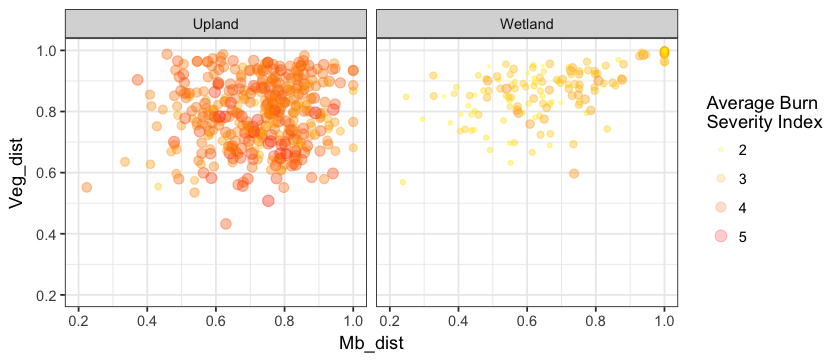

In [23]:
options(repr.plot.width=7, repr.plot.height=3)

df.no0 = df %>%
    filter(Site_ID_1 != Site_ID_2)%>%
    #filter(Veg_Comm != "Different")%>%
    filter(Land_Class!= "Different")

p = ggplot(df.no0 , aes(y=Veg_dist, x=Mb_dist, color=Burn_Severity_Index_Mean, size=Burn_Severity_Index_Mean))
p = p + geom_point(alpha=0.2) + scale_color_gradient(low="yellow",high="red")
p = p + facet_wrap(~Land_Class) 
p = p + scale_x_continuous(limits = c(0.2,1))
p = p + scale_y_continuous(limits = c(0.2,1))
p = p + scale_size(range=c(0,3))
#p = p + geom_abline(intercept=0, slope=1, linetype="dashed")
p = p + guides(color=guide_legend(title="Average Burn\nSeverity Index"),size=guide_legend(title="Average Burn\nSeverity Index"))
#p = p + geom_abline(intercept=0,slope=1, linetype=2)
p = p + theme_bw()
p

### What if we compare MB dist to only the baseline unburned sites and then plot by severity?

In [24]:
# Get the sample data with proper IDs
SamDat = sample_data(ps)
rownames(SamDat) = SamDat$Sample_ID

In [25]:
Dist.mb[upper.tri(Dist.mb)] = NA
df = data.frame(melt(Dist.mb))
#Generates a dataframe with each contrast and the dissimilarity for the mb comm
colnames(df) = c("Sample_ID_1","Sample_ID_2","Mb_dist")
df = df[df$Mb_dist!=0,]
df = df[!is.na(df$Mb_dist),]

In [26]:
# Need to add datasets for each site type, and then whether they are the same or not.
# Let's start with wetland vs. upland
for (i in df$Sample_ID_1){
    df$Land_Class_1[df$Sample_ID_1==i] = paste(SamDat$Land_Class[SamDat$Sample_ID==i])
}
for (i in df$Sample_ID_2){
    df$Land_Class_2[df$Sample_ID_2==i] = paste(SamDat$Land_Class[SamDat$Sample_ID==i])
}
df$Land_Class = ifelse(df$Land_Class_1==df$Land_Class_2,df$Land_Class_1,"Different")

# Let's add Veg_Comm
for (i in df$Sample_ID_1){
    df$Veg_Comm_1[df$Sample_ID_1==i] = paste(SamDat$Veg_Comm[SamDat$Sample_ID==i])
}
for (i in df$Sample_ID_2){
    df$Veg_Comm_2[df$Sample_ID_2==i] = paste(SamDat$Veg_Comm[SamDat$Sample_ID==i])
}
df$Veg_Comm = ifelse(df$Veg_Comm_1==df$Veg_Comm_2,df$Veg_Comm_1,"Different")

# Let's add Org_or_Min
for (i in df$Sample_ID_1){
    df$Org_or_Min_1[df$Sample_ID_1==i] = paste(SamDat$Org_or_Min[SamDat$Sample_ID==i])
}
for (i in df$Sample_ID_2){
    df$Org_or_Min_2[df$Sample_ID_2==i] = paste(SamDat$Org_or_Min[SamDat$Sample_ID==i])
}
df$Org_or_Min = ifelse(df$Org_or_Min_1==df$Org_or_Min_2,df$Org_or_Min_1,"Different")

# Let's add Burned_Unburned
for (i in df$Sample_ID_1){
    df$Burned_Unburned_1[df$Sample_ID_1==i] = paste(SamDat$Burned_Unburned[SamDat$Sample_ID==i])
}
for (i in df$Sample_ID_2){
    df$Burned_Unburned_2[df$Sample_ID_2==i] = paste(SamDat$Burned_Unburned[SamDat$Sample_ID==i])
}
df$Burned_Unburned = ifelse(df$Burned_Unburned_1==df$Burned_Unburned_2,df$Burned_Unburned_1,"Different")

# And let's add Burn_Severity_Index
for (i in df$Sample_ID_1){
    df$Burn_Severity_Index_1[df$Sample_ID_1==i] = SamDat$Burn_Severity_Index[SamDat$Sample_ID==i]
}
for (i in df$Sample_ID_2){
    df$Burn_Severity_Index_2[df$Sample_ID_2==i] = SamDat$Burn_Severity_Index[SamDat$Sample_ID==i]
}
df$Burn_Severity_Index_1 = as.numeric(df$Burn_Severity_Index_1)
df$Burn_Severity_Index_2 = as.numeric(df$Burn_Severity_Index_2)
df$Burn_Severity_Index_Diff = abs(as.numeric(df$Burn_Severity_Index_1) - as.numeric(df$Burn_Severity_Index_2))
df$Burn_Severity_Index_Mean = (as.numeric(df$Burn_Severity_Index_1) + as.numeric(df$Burn_Severity_Index_2))/2
df$Burn_Severity_Index_Ratio = as.numeric(df$Burn_Severity_Index_1) / as.numeric(df$Burn_Severity_Index_2)
df$Burn_Severity_Index_Class = ifelse(df$Burn_Severity_Index_1>mean(df$Burn_Severity_Index_1) &
                                     df$Burn_Severity_Index_2>mean(df$Burn_Severity_Index_1),"high",
                                      ifelse(df$Burn_Severity_Index_1<mean(df$Burn_Severity_Index_1) &
                                     df$Burn_Severity_Index_2<mean(df$Burn_Severity_Index_1),"low","mixed"))
df$Burn_Severity_Index_Class = ordered(df$Burn_Severity_Index_Class, levels = c("high", "mixed", "low"))

# And let's add CBI
for (i in df$Sample_ID_1){
    df$CBI_1[df$Sample_ID_1==i] = SamDat$CBI[SamDat$Sample_ID==i]
}
for (i in df$Sample_ID_2){
    df$CBI_2[df$Sample_ID_2==i] = SamDat$CBI[SamDat$Sample_ID==i]
}
df$CBI_Diff = abs(as.numeric(df$CBI_1) - as.numeric(df$CBI_2))
df$CBI_Mean = (as.numeric(df$CBI_1) + as.numeric(df$CBI_2))/2

# And let's add RBR
for (i in df$Sample_ID_1){
    df$RBR_1[df$Sample_ID_1==i] = SamDat$RBR[SamDat$Sample_ID==i]
}
for (i in df$Sample_ID_2){
    df$RBR_2[df$Sample_ID_2==i] = SamDat$RBR[SamDat$Sample_ID==i]
}
df$RBR_Diff = abs(as.numeric(df$RBR_1) - as.numeric(df$RBR_2))
df$RBR_Mean = (as.numeric(df$RBR_1) + as.numeric(df$RBR_2))/2


# And let's add Understory_CBI
for (i in df$Sample_ID_1){
    df$Understory_CBI_1[df$Sample_ID_1==i] = SamDat$Understory_CBI[SamDat$Sample_ID==i]
}
for (i in df$Sample_ID_2){
    df$Understory_CBI_2[df$Sample_ID_2==i] = SamDat$Understory_CBI[SamDat$Sample_ID==i]
}
df$Understory_CBI_Diff = abs(as.numeric(df$Understory_CBI_1) - as.numeric(df$Understory_CBI_2))
df$Understory_CBI_Mean = (as.numeric(df$Understory_CBI_1) + as.numeric(df$Understory_CBI_2))/2


# And why not pH?
for (i in df$Sample_ID_1){
    df$pH_1[df$Sample_ID_1==i] = SamDat$pH[SamDat$Sample_ID==i]
}
for (i in df$Sample_ID_2){
    df$pH_2[df$Sample_ID_2==i] = SamDat$pH[SamDat$Sample_ID==i]
}
df$pH_Diff = abs(as.numeric(df$pH_1) - as.numeric(df$pH_2))
df$pH_Mean = (as.numeric(df$pH_1) + as.numeric(df$pH_2))/2

# And let's add Severity_Class
for (i in df$Sample_ID_1){
    df$Severity_Class_1[df$Sample_ID_1==i] = paste(SamDat$Severity_Class[SamDat$Sample_ID==i])
}
for (i in df$Sample_ID_2){
    df$Severity_Class_2[df$Sample_ID_2==i] = paste(SamDat$Severity_Class[SamDat$Sample_ID==i])
}
df$Severity_Class_2 = ordered(df$Severity_Class_2,levels=c("High", "Moderate", "Low"))
df$Severity_Class_1 = ordered(df$Severity_Class_1,levels=c("Low", "Moderate", "High"))
df$Severity_Class = ifelse(df$Severity_Class_1==df$Severity_Class_2,paste(df$Severity_Class_1),"Different")
df$Severity_Class = ordered(df$Severity_Class,levels=c("Low", "Moderate", "High","Different"))

In [27]:
# Selecting only comparisons between unburned and burned sites
df = df[(df$Burned_Unburned_1=="Unburned" | df$Burned_Unburned_2=="Unburned"),]
df = df[df$Org_or_Min != "Different",]
df = df[df$Veg_Comm != "Different",]
dim(df)

[1] 225  40

In [28]:
# Is dissimilarity significantly related to burn severity index for wetlands? (no)
dfmod = df[df$Land_Class=="Wetland",]
lm = lm(Mb_dist~Burn_Severity_Index_Diff,data=dfmod)
summary(lm)


Call:
lm(formula = Mb_dist ~ Burn_Severity_Index_Diff, data = dfmod)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.23851 -0.05278  0.01464  0.06471  0.14802 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)              0.833775   0.030932  26.955   <2e-16 ***
Burn_Severity_Index_Diff 0.004146   0.022282   0.186    0.853    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.08961 on 41 degrees of freedom
Multiple R-squared:  0.0008438,	Adjusted R-squared:  -0.02353 
F-statistic: 0.03463 on 1 and 41 DF,  p-value: 0.8533


In [30]:
# Is dissimilarity significantly related to burn severity index for uplands? (yes)
dfmod = df[df$Land_Class!="Wetland",]
lm = lm(Mb_dist~Burn_Severity_Index_Diff,data=dfmod)
summary(lm)


Call:
lm(formula = Mb_dist ~ Burn_Severity_Index_Diff, data = dfmod)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.31900 -0.06974  0.01720  0.08800  0.16572 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)              0.691721   0.019233  35.965  < 2e-16 ***
Burn_Severity_Index_Diff 0.051080   0.007102   7.193 1.65e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1031 on 180 degrees of freedom
Multiple R-squared:  0.2233,	Adjusted R-squared:  0.2189 
F-statistic: 51.74 on 1 and 180 DF,  p-value: 1.647e-11


Warning message:
“Removed 1 rows containing missing values (geom_abline).”

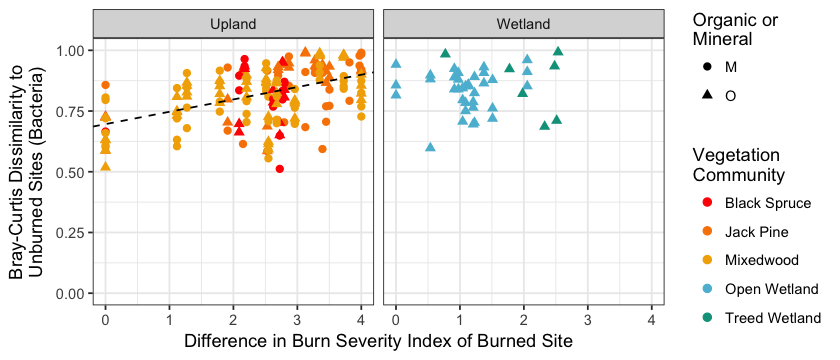

In [31]:
options(repr.plot.width=7, repr.plot.height=3)

p = ggplot(df,aes(x=Burn_Severity_Index_Diff,y=Mb_dist,color=Veg_Comm, shape=Org_or_Min))
p = p + geom_point(size=2)
p = p + scale_color_manual(values=wes_palette("Darjeeling")[c(1,4,3,5,2)])
p = p + scale_fill_manual(values=wes_palette("Darjeeling")[c(1,4,3,5,2)])
p = p + scale_shape_manual(values=c(16,17,23,25,15))
linedata = data.frame(Land_Class=c("Upland","Wetland"), slope=c(0.050835,NA), intercept=c(0.696146,NA))
p = p + geom_abline(data=linedata, aes(slope=slope,intercept=intercept),linetype=2)
p = p + ylim(values=c(0,1))
p = p + theme_bw()
p = p + facet_wrap(~Land_Class,ncol=2)
p = p + ylab("Bray-Curtis Dissimilarity to\nUnburned Sites (Bacteria)") + xlab("Difference in Burn Severity Index of Burned Site")
p = p + guides(color=guide_legend(title="Vegetation\nCommunity"),shape=guide_legend(title="Organic or\nMineral"))
p